Chapter 5 Question 3 

We now review k-fold cross-validation.

(a) Explain how k-fold cross-validation is implemented.

(b) What are the advantages and disadvantages of k-fold crossvalidation
relative to:

i. The validation set approach?

ii. LOOCV?

Answer:

A) The k-fold CV works by dividing the data randomly in equal parts (k), where there is a part k  reserved to obtain the predictions using the the model fitted in the other k parts.
This is done in tuns for each part k and the results are combined.
The best choises for k are 5 or 10.


B) 
i. Since each training sets is only (k-1)/k as big as the original training set, the estimates of prediction error will typically be biased upward.

ii. The bias is minimized when k = n (LOOCV), but tis estimate has right variance, as noted earlier.


Chapter 5 Question 8

We will now perform cross-validation on a simulated data set.

A) Generate a simulated data set as follows:

In [1]:
set.seed(1)
y = rnorm(100)
x = rnorm(100)
y = x - 2 * x^2 + rnorm(100)

In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.

n = 100 and p = 2

B) Create a scatterplot of X against Y . Comment on what you find.

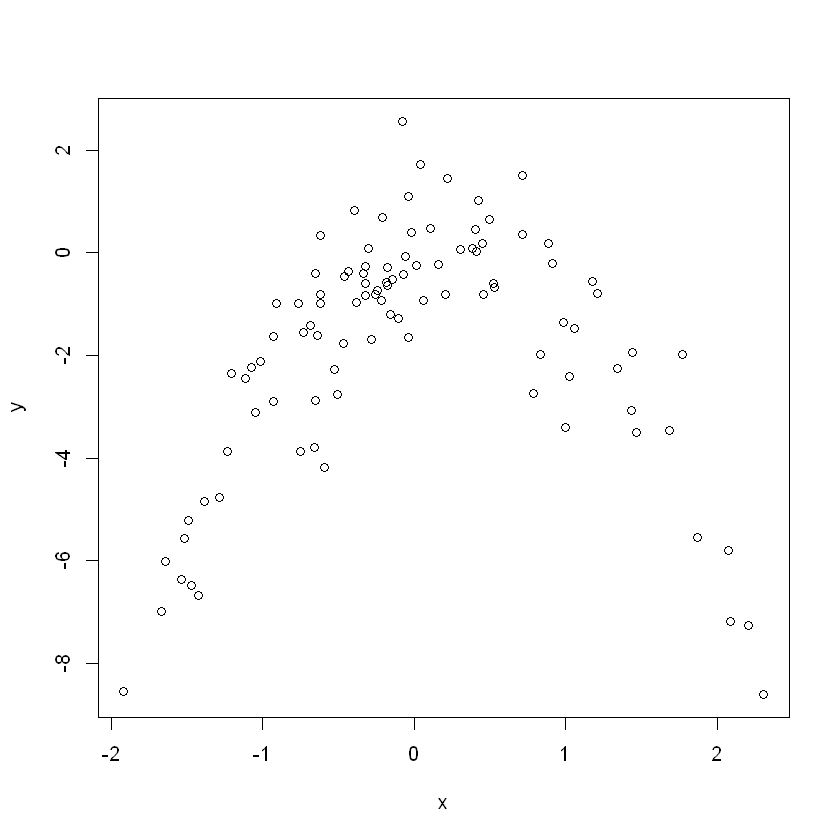

In [2]:
plot(x,y)

C) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

In [5]:
library(boot)
hw = data.frame(x,y)
set.seed(456)

i.

In [6]:
glm.fit = glm(y ~ x)
cv.glm(hw, glm.fit)$delta

[1] 5.890979 5.888812

ii.

In [7]:
glm.fit = glm(y ~ poly(x, 2))
cv.glm(hw, glm.fit)$delta

[1] 1.086596 1.086326

iii.

In [8]:
glm.fit = glm(y ~ poly(x, 3))
cv.glm(hw, glm.fit)$delta

[1] 1.102585 1.102227

iV.

In [9]:
glm.fit = glm(y ~ poly(x, 4))
cv.glm(hw, glm.fit)$delta

[1] 1.114772 1.114334

D) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [10]:
set.seed(654)

i.

In [11]:
glm.fit = glm(y ~ x)
cv.glm(hw, glm.fit)$delta

[1] 5.890979 5.888812

ii.

In [13]:
glm.fit = glm(y ~ poly(x, 2))
cv.glm(hw, glm.fit)$delta

[1] 1.086596 1.086326

iii.

In [14]:
glm.fit = glm(y ~ poly(x, 3))
cv.glm(hw, glm.fit)$delta

[1] 1.102585 1.102227

iv.

In [15]:
glm.fit = glm(y ~ poly(x, 4))
cv.glm(hw, glm.fit)$delta

[1] 1.114772 1.114334

The Results are the same because it use the sale LOOCV.

E) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

The example ii. 

F) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [16]:
summary(glm.fit)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8914  -0.5244   0.0749   0.5932   2.7796  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.8277     0.1041 -17.549   <2e-16 ***
poly(x, 4)1   2.3164     1.0415   2.224   0.0285 *  
poly(x, 4)2 -21.0586     1.0415 -20.220   <2e-16 ***
poly(x, 4)3  -0.3048     1.0415  -0.293   0.7704    
poly(x, 4)4  -0.4926     1.0415  -0.473   0.6373    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1.084654)

    Null deviance: 552.21  on 99  degrees of freedom
Residual deviance: 103.04  on 95  degrees of freedom
AIC: 298.78

Number of Fisher Scoring iterations: 2


The pvlues with the * are the most relevant.

Chapter 6 Question 1

We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain p + 1 models, containing 0, 1, 2, . . . , p predictors. Explain your answers:

A) Which of the three models with k predictors has the smallest training RSS?

Answer: The best subset could have the smallest training Residual Sum Squares. . Forward stepwise and backward stepwise create models with a path dependency on which predictors they pick first as they iterate to the k'th model.

B) Which of the three models with k predictors has the smallest test RSS?

Answer: The best subset selection have the smalles RSS.

C) True or False:

i. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-variable
model identified by forward stepwise selection.

TRUE

ii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)- variable model identified by backward stepwise selection.

TRUE

iii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)-
variable model identified by forward stepwise selection.

FALSE.

iv. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-variable
model identified by backward stepwise selection.

FALSE

v. The predictors in the k-variable model identified by best subset are a subset of the predictors in the (k + 1)-variable
model identified by best subset selection.

FALSE

Chapter 6 Question 9

In this exercise, we will predict the number of applications received using the other variables in the College data set.

A) Split the data set into a training set and a test set.

In [20]:
install.packages("ISLR")

package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\omantilla\AppData\Local\Temp\RtmpKAPukS\downloaded_packages


In [30]:
# Loading ISLR Library
library("ISLR")

# Loading Data
data("College")

# Checking Data Summary
summary(College)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

In [45]:
# Setting a seed
set.seed(567)

In [46]:
# Checking dimmensions
dim(College)

[1] 777  18

In [47]:
# Splitting the data

train.size = dim(College)[1] / 2

train = sample(1:dim(College)[1], train.size)
test = (-train)
college.train = College[train, ]
college.test = College[test, ]

B) Fit a linear model using least squares on the training set, and report the test error obtained.

In [48]:
# Fitting linear model
lm.fit = lm(Apps ~., data=college.train)
lm.pred = predict(lm.fit, college.test)
mean((college.test[, "Apps"] - lm.pred)^2)

[1] 1018981

Test Error: 1018980.56968143

C) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [49]:
# Loading library
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-2



In [55]:
train_mat = model.matrix(Apps ~ . , data = college.train)
test_mat = model.matrix(Apps ~ . , data = college.test)
grid = 10 ^ seq(4, -2, length = 100)
ridge.mod = cv.glmnet(train_mat, college.train[, "Apps"], alpha=0, lambda=grid, thresh=1e-12)
bestlamda = ridge.mod$lambda.min
bestlamda

[1] 0.01

lamda = 0.01

In [60]:
ridge.pred = predict(ridge.mod, s=bestlamda, newx=test_mat)
mean((college.test[, "Apps"] - ridge.pred)^2)

[1] 1018969

Test Error: 1018968.94329358

D) Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number
of non-zero coefficient estimates.

In [61]:
lasso.mod = cv.glmnet(train_mat, college.train[, "Apps"], alpha=1, lambda=grid)
bestlambda = lasso.mod$lambda.min
bestlambda

[1] 57.22368

In [63]:
lasso.pred = predict(lasso.mod, s=bestlambda, newx=test_mat)
mean((college.test[, "Apps"] - lasso.pred)^2)

[1] 1031176

Erro 1031175.56842805

E) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value
of M selected by cross-validation.

In [65]:
install.packages("pls")

package 'pls' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\omantilla\AppData\Local\Temp\RtmpKAPukS\downloaded_packages


In [68]:
library(pls)
set.seed(2)

In [69]:
pcr.fit = pcr(Apps~., data=college.train, scale=TRUE, validation="CV")

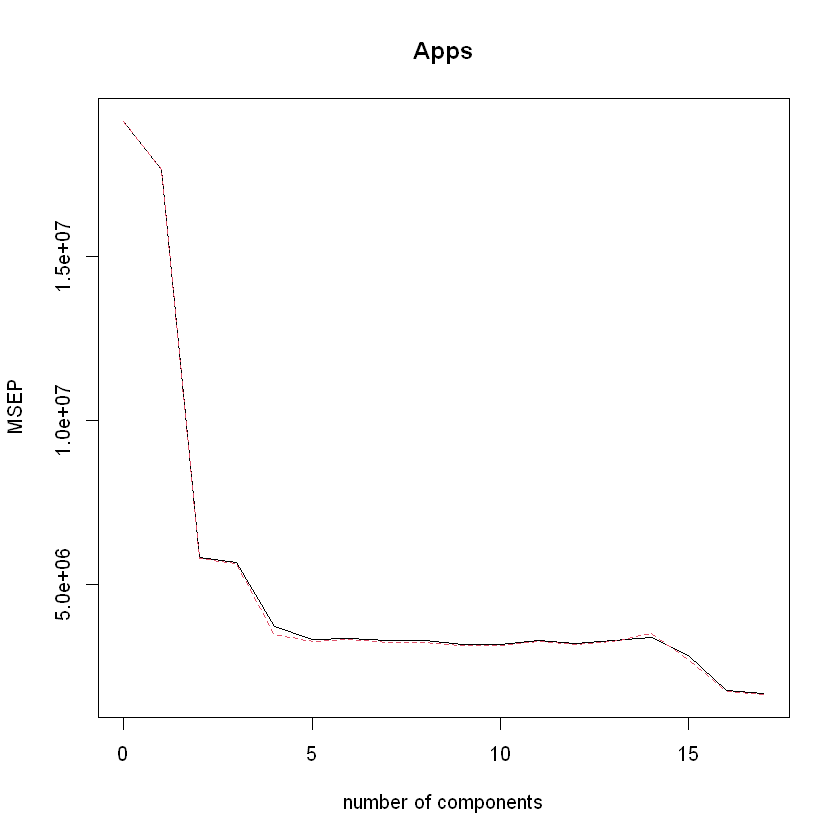

In [70]:
validationplot(pcr.fit, val.type="MSEP")

In [75]:
pcr.pred = predict(pcr.fit, college.test, ncomp=5)
mean((college.test[, "Apps"] - data.frame(pcr.pred))^2)

Warning message in mean.default((college.test[, "Apps"] - data.frame(pcr.pred))^2):
"argument is not numeric or logical: returning NA"


[1] NA

F) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value
of M selected by cross-validation.

In [72]:
set.seed(1)

In [73]:
pls.fit = plsr(Apps~., data=college.train, scale=TRUE, validation="CV")

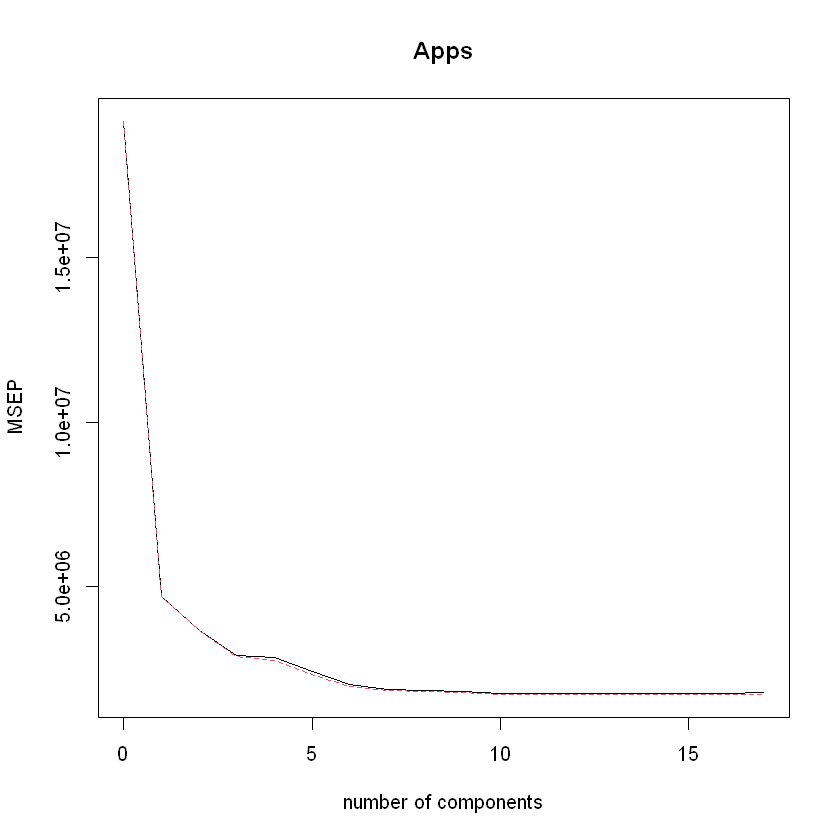

In [74]:
validationplot(pls.fit, val.type="MSEP")

In [76]:
pls.pred = predict(pls.fit, college.test, ncomp=10)
mean((college.test[, "Apps"] - data.frame(pls.pred))^2)

Warning message in mean.default((college.test[, "Apps"] - data.frame(pls.pred))^2):
"argument is not numeric or logical: returning NA"


[1] NA

G) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much
difference among the test errors resulting from these five approaches?

Chapter 7 Question 9

This question uses the variables dis (the weighted mean of distances to five Boston employment centers) and nox (nitrogen oxides concentration in parts per 10 million) from the Boston data. We will treat dis as the predictor and nox as the response.

A) Use the poly() function to fit a cubic polynomial regression to predict nox using dis. Report the regression output, and plot the resulting data and polynomial fits.

In [78]:
library("MASS")

In [80]:
data(Boston)

In [81]:
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [84]:
fit = lm(nox ~ poly(dis, 3), data = Boston)
summary(fit)


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


In [85]:
dislims = range(dis)
dis.grid = seq(from = dislims[1], to = dislims[2])
preds = predict(fit, newdata=list(dis = dis.grid), se=TRUE)
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, lm.pred, lwd = 2, col = "blue")

ERROR: Error in eval(expr, envir, enclos): object 'dis' not found


In [87]:
dislim = range(dis)
dis.grid = seq(from = dislim[1], to = dislim[2], by = 0.1)
lm.pred = predict(fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, lm.pred, col = "red", lwd = 2)

ERROR: Error in eval(expr, envir, enclos): object 'dis' not found


B) Plot the polynomial fits for a range of different polynomial degrees (say, from 1 to 10), and report the associated residual
sum of squares.

C) Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results.

D) Use the bs() function to fit a regression spline to predict nox using dis. Report the output for the fit using four degrees of freedom. How did you choose the knots? Plot the resulting fit.